In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
read_accident_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\road-accidents.csv',sep='|',skiprows=9)
print(read_accident_data.shape)
read_accident_data.head()

(51, 5)


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [4]:
mile_der_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\miles-driven.csv',sep='|')
mile_der_data.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
#merge the two datsets based on the state column
data=pd.merge(read_accident_data,mile_der_data,on='state')

#compute the no of accidents
data['no_fal_accitends']=data['drvr_fatl_col_bmiles']*data['million_miles_annually']/1000

# for the comaprision purpose it is not fair they are in the form of pertentage so i chaged those into numbers
# after changing those into numbers i can found the correlation correctly

data['no_falt_alcohol']=(data['perc_fatl_alcohol']*data['no_fal_accitends'])/100
data['no_fal_speed']=(data['perc_fatl_speed']*data['no_fal_accitends'])/100
data['no_falt_1st_time']=(data['perc_fatl_1st_time']*data['no_fal_accitends'])/100

#copy neccesary data to new datframe 
feature_name=['state','no_falt_1st_time','no_fal_speed','no_falt_alcohol','no_fal_accitends']
data_acci=data[feature_name]
data_acci.head()

,state,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends
0,Alabama,976.306560,475.949448,366.114960,1220.3832
1,Alaska,78.145302,34.084653,20.783325,83.1333
2,Arizona,1063.771200,387.833250,310.266600,1108.0950
3,Arkansas,701.239840,132.866496,191.918272,738.1472
4,California,3425.973120,1347.292800,1077.834240,3849.4080


In [6]:
# some statistical summary 
data_acci.describe()

,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends
count,51.000000,51.000000,51.000000,51.000000
mean,786.705668,281.364821,275.049392,894.808047
std,821.089400,335.042463,306.321060,927.452441
min,21.051200,7.157408,5.683824,21.051200
25%,247.498254,88.726698,95.613486,267.004850
50%,602.149520,153.448596,191.918272,633.841600
75%,1002.525369,327.594216,370.101876,1136.839750
max,4007.512320,1842.534400,1750.407680,4606.336000


#### usually it is easy to see the correlatio between the columns using the seaborn 

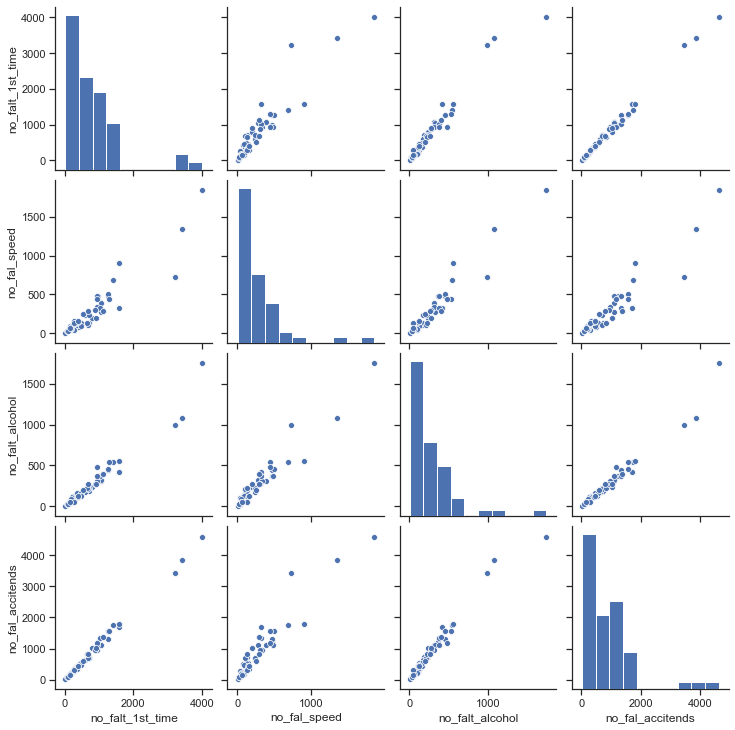

In [7]:
#deeper unserstanding through some distribution visualization
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_acci)

###### Pearson correlation coefficinet is also the way to find the correlation between the features and it is used to quantify the 
correlation between that. ranges from -1 - 1 <br/>
-1 opposite correlation<br/>
0 no correlation<br/>
1 strong correlation

In [8]:
#Pearson correlation coefficient matrix through pandas
data_acci.corr()

,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends
no_falt_1st_time,1.000000,0.932976,0.975681,0.996625
no_fal_speed,0.932976,1.000000,0.962503,0.942785
no_falt_alcohol,0.975681,0.962503,1.000000,0.982053
no_fal_accitends,0.996625,0.942785,0.982053,1.000000


# multivariant linear regression
From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression

In [9]:
#fit the multivariant linear regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(data_acci.iloc[:,1:-1].values,data_acci['no_fal_accitends'])
lr.coef_

array([0.9088857 , 0.09331756, 0.4981264 ])

 from this we can say that the alcohol consumption is weakly correlated to the number of accidents.This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents

In [27]:
# pca 
#PCA uses the absolute variance to calculate the overall variance explained for each principal component, 
#so it is important that the features are on a similar scale

# sclaing the data
from sklearn.preprocessing import StandardScaler

#create scalar object
scalar=StandardScaler()

#fit and transform the data 
data_scaled=scalar.fit_transform(data_acci.iloc[:,1:-1])

#transform numpy array to dataframe to apply the iloc function
data_scaled=pd.DataFrame(data_scaled)

#apply  PCA for feature extraction process
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(data_scaled)
data_scaled.head()

,0,1,2
0,0.233212,0.586555,0.300246
1,-0.871538,-0.745400,-0.838323
2,0.340794,0.320938,0.116112
3,-0.105124,-0.447633,-0.274086
4,3.246333,3.213129,2.646808


In [28]:
# shape(n_componetions,n_features) Principal axes in feature space, representing the directions of maximum variance in the data. 
pca.components_

array([[ 0.5762838 ,  0.57358947,  0.58214439],
       [ 0.63545821, -0.76241251,  0.12214755]])

explained variance ratio of each principal
component, available via the explained_variance_ratio_ variable. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal component.
For example, let’s look at the explained variance ratios of the first two components
of the 3D dataset represented 

This tells you that 97.1% of the dataset’s variance lies along the first axis, and 2.2%
lies along the second axis. This leaves less than 0.7% for the third axis, so it is reasonable
to assume that it probably carries little information.

In [30]:
pca.explained_variance_ratio_

array([0.97140562, 0.02272521])

In [ ]:
# visualize the firat 2 principle components
